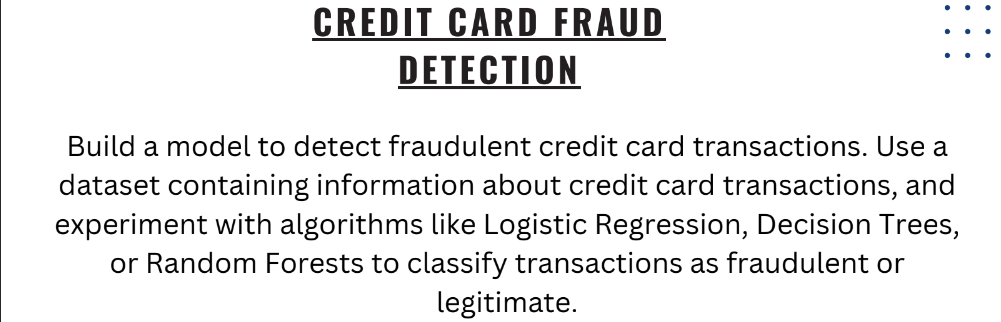
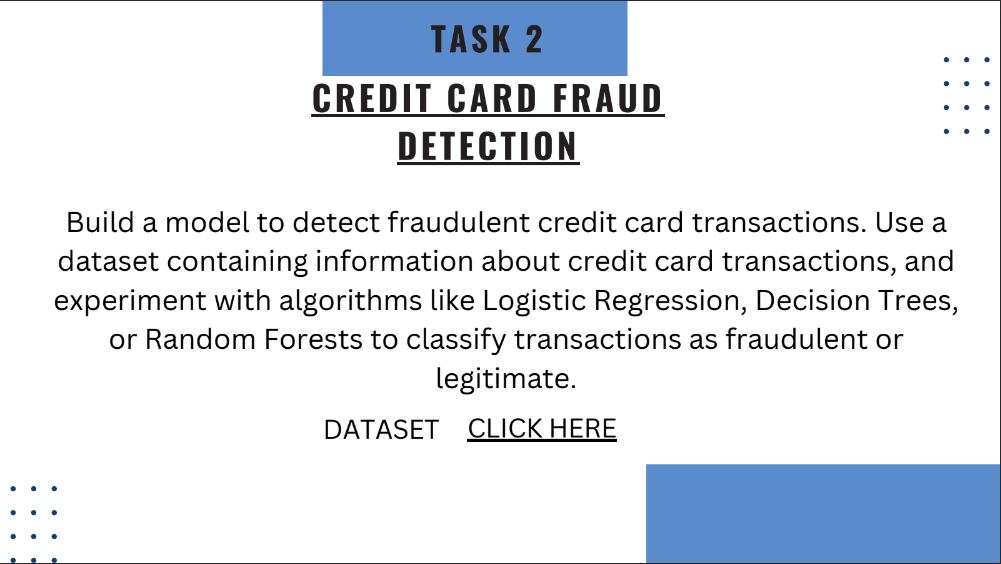

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
URL = 'fraudTrain.csv'
train_data=pd.read_csv(URL)
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
URL1 = 'fraudTest.csv'
test_data=pd.read_csv(URL1)
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
train_data['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [6]:
features = ['trans_date_trans_time', 'category', 'gender', 'dob']

train_x=train_data[features]
train_y = train_data['is_fraud']

test_x=test_data[features]
test_y = test_data['is_fraud']

In [7]:
train_x.head()

,trans_date_trans_time,category,gender,dob
0,2019-01-01 00:00:18,misc_net,F,1988-03-09
1,2019-01-01 00:00:44,grocery_pos,F,1978-06-21
2,2019-01-01 00:00:51,entertainment,M,1962-01-19
3,2019-01-01 00:01:16,gas_transport,M,1967-01-12
4,2019-01-01 00:03:06,misc_pos,M,1986-03-28


In [8]:
#convert to datetime
train_x['trans_date_trans_time'] = pd.to_datetime(train_x['trans_date_trans_time'])
# #converting to datetime
train_x['dob'] = pd.to_datetime(train_x['dob'])
#derive age
train_x['age'] = np.round((train_x['trans_date_trans_time'] - train_x['dob'])/np.timedelta64(1, 'Y')).astype(int)
#derive hour
train_x['trans_hour'] = train_x['trans_date_trans_time'].dt.hour
#derive the 'day'
train_x['trans_day'] = train_x['trans_date_trans_time'].dt.day_name()

In [9]:
#convert to datetime
test_x['trans_date_trans_time'] = pd.to_datetime(test_x['trans_date_trans_time'])
# #converting to datetime
test_x['dob'] = pd.to_datetime(test_x['dob'])
#derive age
test_x['age'] = np.round((test_x['trans_date_trans_time'] - test_x['dob'])/np.timedelta64(1, 'Y')).astype(int)
#derive hour
test_x['trans_hour'] = test_x['trans_date_trans_time'].dt.hour
#derive the 'day'
test_x['trans_day'] = test_x['trans_date_trans_time'].dt.day_name()

In [10]:
import category_encoders

gender_mapping = [{'col':'gender','mapping':{'M':0,'F':1}}]
category_mapping = [{'col':'category','mapping':{'misc_net':1, 'grocery_pos':2, 'entertainment':3,
                                                 'gas_transport':4,'misc_pos':5, 'grocery_net':6,
                                                 'shopping_net':7, 'shopping_pos':8,'food_dining':9,
                                                 'personal_care':10, 'health_fitness':11, 'travel':12,
                                                 'kids_pets':13, 'home':14}}]
day_mapping = [{'col':'trans_day','mapping':{'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 
                                             'Saturday':5, 'Sunday':6,'Monday':0}}]

gender_encoder = category_encoders.OrdinalEncoder(mapping = gender_mapping, return_df = True)  
category_encoder = category_encoders.OrdinalEncoder(mapping = category_mapping, return_df = True)  
day_encoder = category_encoders.OrdinalEncoder(mapping = day_mapping, return_df = True)  

train_x['trans_day'] = day_encoder.fit_transform(train_x['trans_day'])
train_x['gender'] = gender_encoder.fit_transform(train_x['gender'])
train_x['category'] = category_encoder.fit_transform(train_x['category'])

test_x['trans_day'] = day_encoder.fit_transform(test_x['trans_day'])
test_x['gender'] = gender_encoder.fit_transform(test_x['gender'])
test_x['category'] = category_encoder.fit_transform(test_x['category'])

#####

In [11]:
train_x.head()

,trans_date_trans_time,category,gender,dob,age,trans_hour,trans_day
0,2019-01-01 00:00:18,1,1,1988-03-09,31,0,1
1,2019-01-01 00:00:44,2,1,1978-06-21,41,0,1
2,2019-01-01 00:00:51,3,0,1962-01-19,57,0,1
3,2019-01-01 00:01:16,4,0,1967-01-12,52,0,1
4,2019-01-01 00:03:06,5,0,1986-03-28,33,0,1


In [12]:
#drop values
train_x.drop(['dob'] , axis=1, inplace=True)
test_x.drop(['dob'] , axis=1, inplace=True)

train_x.drop(['trans_date_trans_time'] , axis=1, inplace=True)
test_x.drop(['trans_date_trans_time'] , axis=1, inplace=True)

In [13]:
test_x.head()

,category,gender,age,trans_hour,trans_day
0,10,0,52,12,6
1,10,1,30,12,6
2,11,1,50,12,6
3,5,0,33,12,6
4,12,0,65,12,6


In [14]:
from sklearn.ensemble import RandomForestClassifier
regressor_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
regressor_model.fit(train_x,train_y) 

RandomForestClassifier(n_estimators=10, random_state=0)

In [15]:
from sklearn.metrics import accuracy_score

prediction = regressor_model.predict(train_x)
accuracy = accuracy_score(train_y, prediction)
print("Accuracy on training data:",accuracy)

Accuracy on training data: 0.996416218404766


In [16]:
predictions = regressor_model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy on test data:",accuracy)

Accuracy on test data: 0.9968059396925425
